In [25]:
import  numpy  as  np
import  pandas  as  pd
from  ast  import  literal_eval

in_file = '../data_autonomous/logger.csv'
sample = pd.read_csv(in_file, sep=',')

sample.head()

,t,x,y,s,d,yaw,speed
0,0,909.480,1128.67,124.834,6.16483,0.0,0.000000
1,1,909.484,1128.67,124.838,6.16487,0.0,0.225277
2,2,909.492,1128.67,124.846,6.16494,0.0,0.225277
3,3,909.498,1128.67,124.852,6.16499,0.0,0.225277
4,4,909.506,1128.67,124.860,6.16506,0.0,0.218451


In [26]:
sample.describe()

,t,x,y,s,d,yaw,speed
count,9837.000000,9837.000000,9837.000000,9837.000000,9837.00000,9837.000000,9837.000000
mean,4918.000000,1375.950342,1987.450229,3155.240921,6.14657,178.468336,46.289092
std,2839.841633,770.524943,714.394502,2042.330202,2.63754,113.621425,6.654860
min,0.000000,155.790000,1128.670000,0.550359,1.39901,0.000000,0.000000
25%,2459.000000,562.809000,1189.530000,1288.110000,5.66512,78.156100,46.797200
50%,4918.000000,1544.380000,1896.180000,2832.800000,6.01255,182.457000,49.387800
75%,7377.000000,2114.620000,2772.390000,5008.110000,7.10649,291.557000,49.435900
max,9836.000000,2335.490000,3005.700000,6945.260000,10.42590,359.937000,49.548100


In [27]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
%matplotlib inline

waypoint_file = "../data_autonomous/highway_map.csv"
dfLogger = pd.read_csv("../data_autonomous/logger.csv")

with open(waypoint_file) as f:
    x_waypoint = []
    y_waypoint = []
    count = 0
    for line in f:
        if count > 0:
            data = line.split(' ')
            x_waypoint.append(float(data[0]))
            y_waypoint.append(float(data[1]))
        count += 1

x_path = []
y_path = []
ool_x = []
ool_y = []
ool_angle = []
for i in range(0, len(dfLogger) - 1): 
    x_path.append(dfLogger.loc[i, 'x'])
    y_path.append(dfLogger.loc[i, 'y'])

    #test to see when car switches lanes
    if ((dfLogger.loc[i, 'd'] < 4 and dfLogger.loc[i + 1, 'd'] > 4) or
        (dfLogger.loc[i, 'd'] > 4 and dfLogger.loc[i + 1, 'd'] < 4)):
        ool_x.append(dfLogger.loc[i, 'x'])
        ool_y.append(dfLogger.loc[i, 'y'])
        #get angle of car as well for later down in the project
        ool_angle.append(dfLogger.loc[i, 'yaw'])
    elif ((dfLogger.loc[i, 'd'] < 8 and dfLogger.loc[i + 1, 'd'] > 8) or
        (dfLogger.loc[i, 'd'] > 8 and dfLogger.loc[i + 1, 'd'] < 8)):
        ool_x.append(dfLogger.loc[i, 'x'])
        ool_y.append(dfLogger.loc[i, 'y'])
        #get angle of car as well for later down in the project
        ool_angle.append(dfLogger.loc[i, 'yaw'])
  

x_start = [ x_path[0] ]
y_start = [ y_path[0] ]

x_current = [ x_path[len(x_path)-1] ]
y_current = [ y_path[len(y_path)-1] ]

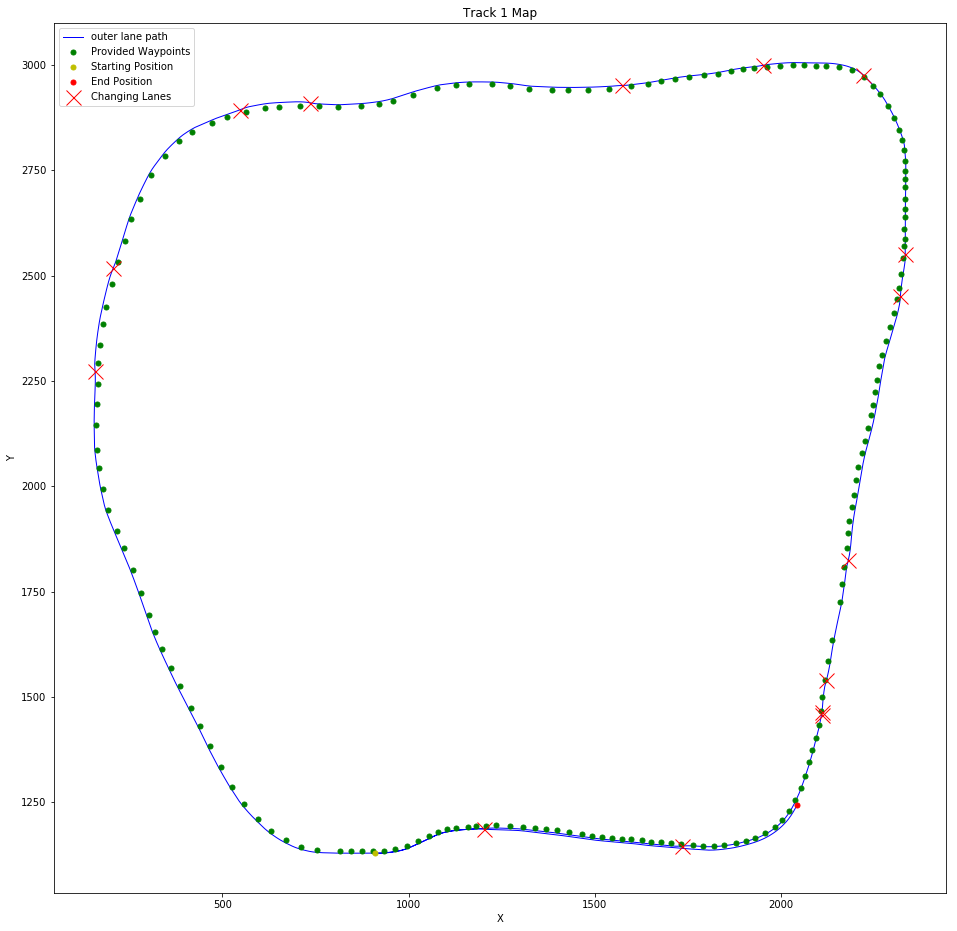

In [28]:
plt.rcParams["figure.figsize"] = [16, 16]
p1 = plt.plot(x_path, y_path, 'b', lw=1.0)
p2 = plt.plot(x_waypoint, y_waypoint, 'go', ms=5.0)
p3 = plt.plot(x_start, y_start, 'yo', ms=5.0)
p4 = plt.plot(x_current, y_current, 'ro', ms=5.0)
p5 = plt.plot(ool_x, ool_y, 'rx', ms=15.0)

plt.title('Track 1 Map')
plt.xlabel("X", fontsize=10)
plt.ylabel("Y", fontsize=10)

plt.legend((p1[0],p2[0], p3[0], p4[0], p5[0]), ('outer lane path','Provided Waypoints', 'Starting Position','End Position', 'Changing Lanes'))
plt.show()

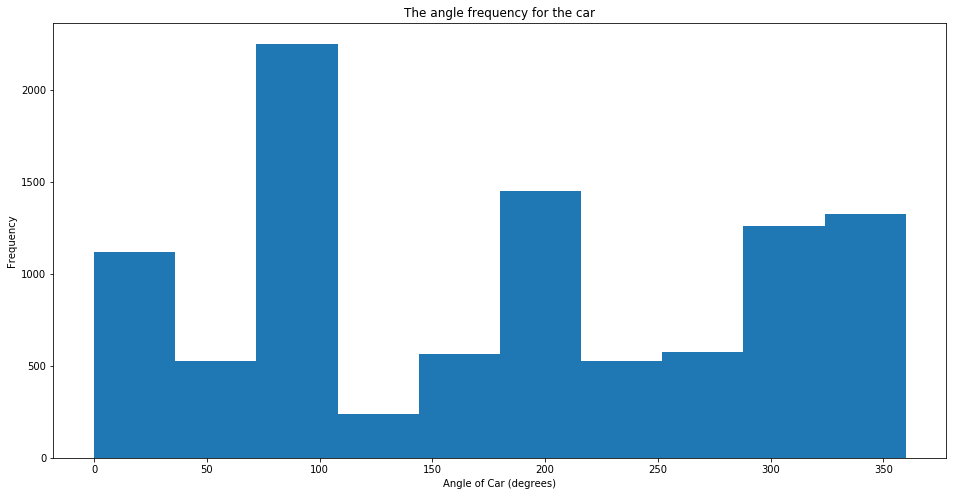

In [29]:
#get angle of car
angle = []
for i in range(0, len(dfLogger) - 1): 
    angle.append(dfLogger.loc[i, 'yaw'])

plt.rcParams["figure.figsize"] = [16, 8]       
plt.hist(angle)
plt.title("The angle frequency for the car")
plt.xlabel("Angle of Car (degrees)")
plt.ylabel("Frequency")
plt.show()

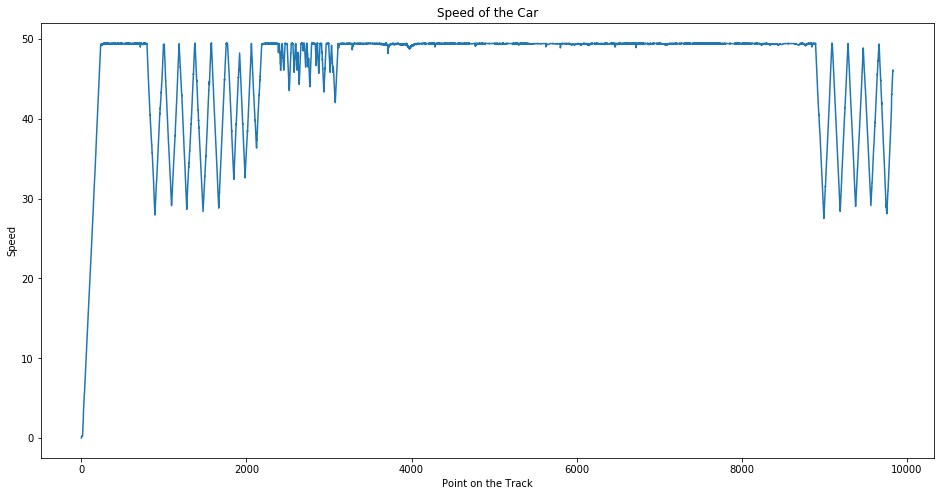

In [30]:
#get speed of car
speed = []
for i in range(0, len(dfLogger) - 1): 
    speed.append(dfLogger.loc[i, 'speed'])

plt.rcParams["figure.figsize"] = [16, 8]       
plt.plot(speed)
plt.title("Speed of the Car")
plt.xlabel("Point on the Track")
plt.ylabel("Speed")
plt.show()

In [31]:
for index in ool_angle:
    print (index)

2.7967299999999997
77.6764
83.3916
73.0663
74.8602
84.5551
89.2256
141.469
188.738
182.53900000000002
171.44799999999998
198.708
245.328
273.623
356.62199999999996


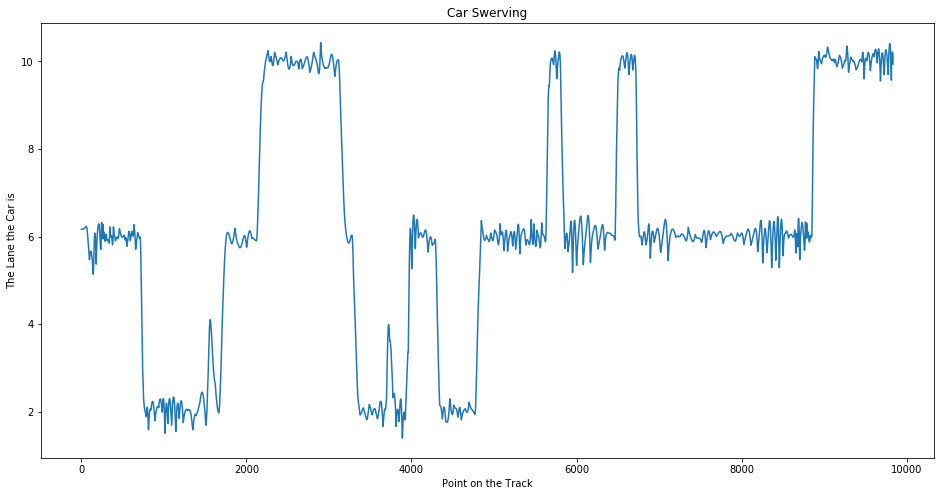

In [33]:
#see if car is swerving
swerve = []
for i in range(0, len(dfLogger)): 
    swerve.append(dfLogger.loc[i, 'd'])

# 2 means car is in left lane, 6 means middle lane, and 10 means right lane
plt.rcParams["figure.figsize"] = [16, 8]       
plt.plot(swerve)
plt.title("Car Swerving")
plt.xlabel("Point on the Track")
plt.ylabel("The Lane the Car is")
plt.show()